<h1 align='center'>
    Comau Smart5 SiX
<h1>

<div align="center">
    <img src="smart5six.jpg" height=500px>
</div>

In [1]:
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
six = Robot()

six.addNonDHLine(0, 0, 450, rad(180), 0, 0)
six.addDHLine(theta1, 0, 150, rad(90))
six.addDHLine(theta2-rad(90), 0, 590, rad(180))
six.addDHLine(theta3+rad(90), 0, 130, -rad(90))
six.addDHLine(theta4, -647.07, 0, -rad(90))
six.addDHLine(theta5, 0, 0, rad(90))
six.addDHLine(theta6, -95, 0, 0)
six.addNonDHLine(0, 0, 0, 0, rad(180), 0)

### Modelo Cinemático Direto:

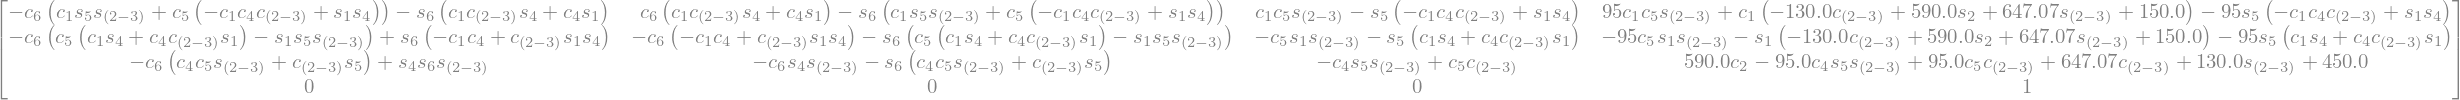

In [3]:
MCD = six.HTM(0, 8, False)

abrev(MCD)

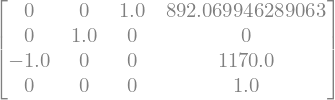

In [4]:
HOME = [0, 0, -rad(90), 0, 0, 0]

six.POSE(HOME)

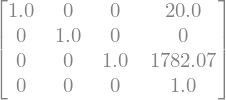

In [5]:
CALLSYS = [0, 0, 0, 0, 0, 0]

six.POSE(CALLSYS)

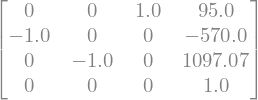

In [6]:
six.POSE([rad(-90), rad(-90), rad(-90), rad(-90), rad(-90), rad(-90)])

### $$\text{Obtenção do Jacobiano de velocidades lineares } J_{v_i} = z_{i-1}^0 \times \left( o_n^0 - o_{i-1}^0 \right) \text{ :}$$

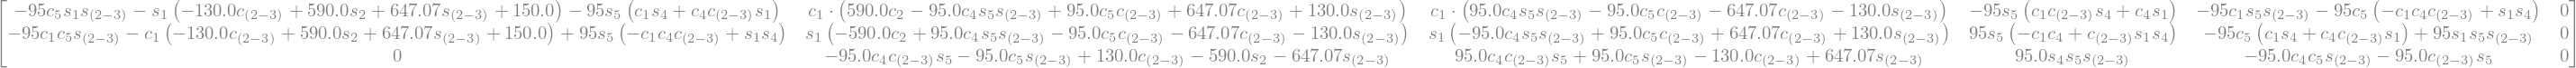

In [7]:
origins = MCD[0:3, 3]

jv = []
for i in thetas:
    jv.append(abrev(simplify(diff(origins, i))))

import numpy as np

Matrix(np.block(jv))

### $$\text{Obtenção de } Z_{i-1}^0 = R_{i-1}^0k \text{ :}$$

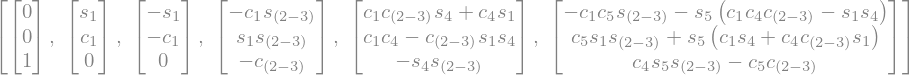

In [8]:
z = [Matrix([[0], [0], [1]])]
n = 8

for i in range(2, n-1):
    z.append(abrev(simplify(six.HTM(0, i)[:3, 2])))

z

### $$\text{Obtenção do Jacobiano de velocidades angulares } J_{\omega_i} = z_{i-1}^0 \text{ :}$$

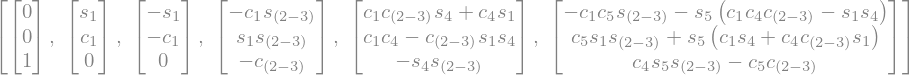

In [9]:
jw = []
for i in range(len(z)):
    if(six.rotational[i]):
        jw.append(simplify(z[i]))
    else:
        jw.append(Matrix([[0], [0], [0]]))

jw

### $$\text{Obtenção do Jacobiano de velocidades completo, tal que } \xi = J(q)\dot{q} \text{ :}$$

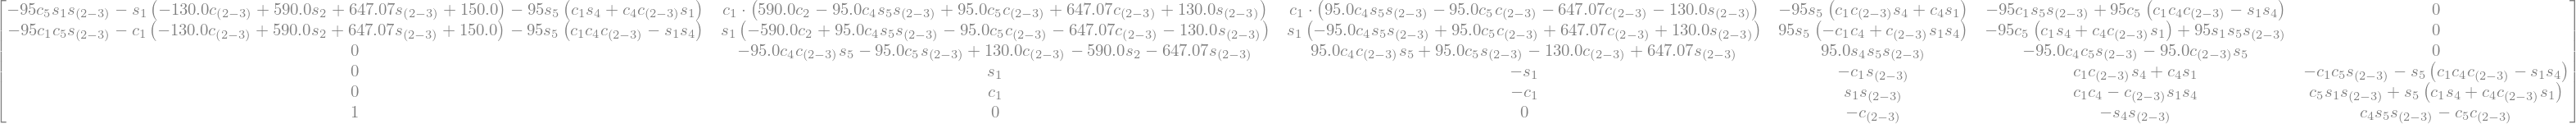

In [10]:
J = []
for k in range(3):
    J.append([])
    for i in range(6):
        J[k].append(simplify(jv[i][k]))
for k in range(3):
    J.append([])
    for i in range(6):
        J[k+3].append(simplify(jw[i][k]))

Matrix(J)